In [9]:
#exploring the spectra of different environments and changes to their spectra for the ZFC

import os, sys
sys.path.append(os.getcwd())
sys.path.append(os.getcwd()+"/FlexModEHC/")

import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

from generators import Generator
from propagators import Propagator
from simulators import Simulator

from environments import LinearTrack, TJunction

from visualization import label_panel, page_width, row_height, color_diff, color_superdiff, color_acmin, plot_wfill, save_figure
from visualization import save_figure, color_diff, color_superdiff, label_panel, page_width, row_height

import complextools

color_real = "green"
color_compl = "blue"
color_compl_imag = "cyan"

from matplotlib import cm

cmap = cmap=plt.cm.RdBu
cmap = cmap=plt.cm.jet_r

In [2]:
import math
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.patches import Arc

def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][-1]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][0] - l2xy[0][-1]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

def get_angle_text(angle_plot):
    angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
    angle = "%0.2f"%float(angle)+u"\u00b0" # Display angle upto 2 decimal places

    # Get the vertices of the angle arc
    vertices = angle_plot.get_verts()

    # Get the midpoint of the arc extremes
    x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    y_width = (vertices[0][5] + vertices[-1][6]) / 2.0

    #print x_width, y_width

    separation_radius = max(x_width/2.0, y_width/2.0)

    return [ x_width + separation_radius, y_width + separation_radius, angle]    

 <font size="10">LinearTrack</font> 

In [3]:
# Linear track (n=3, one-way) 
A = np.array([[-1,1,0],[0,-1,1],[0, 0,0]])
GEN = Generator(Q=A)
PROP = Propagator(GEN=GEN)
L = PROP.GEN.evals_fwd.copy();

#n=n_state
n_state = 10
goal = None
jump_rate = 1.
forward = True
symmetrize=False
ENV = LinearTrack(scale=n_state, goal=goal)
GEN = Generator(ENV=ENV, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate)
PROP = Propagator(GEN=GEN)
K = PROP.GEN.evals_fwd.copy();

GENERATOR: explicit generator provided
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (3, 3) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.
GENERATOR: generator constructed from environment adjacency matrix with jump_rate 1.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (10, 10) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1


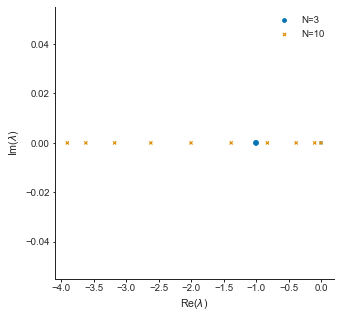

In [4]:
#spectrum comparison (GENERATOR)
%matplotlib inline
#size\propto multiplicity of eigenvalue
counter = Counter(L)
uniqueL = np.array(list(counter.keys()))
multipL = np.array(list(counter.values()))
fig = plt.figure(figsize=(5,5))
plt.scatter(uniqueL.real, uniqueL.imag, s=5**multipL, label="N=3")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

counter = Counter(K)
uniqueK = np.array(list(counter.keys()))
multipK = np.array(list(counter.values()))
plt.scatter(uniqueK.real, uniqueK.imag, s=10**multipK, label="N=10", marker="x")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

plt.legend()

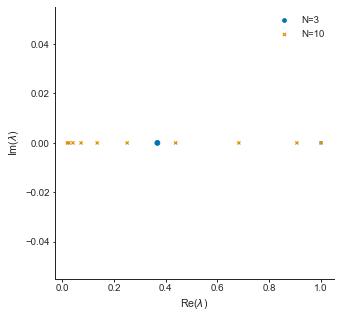

In [5]:
#spectrum of PROPAGATOR
fig = plt.figure(figsize=(5,5))
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=5**multipL, label="N=3")

counter = Counter(K)
uniqueK = np.array(list(counter.keys()))
multipK = np.array(list(counter.values()))

plt.scatter(np.exp(uniqueK).real, np.exp(uniqueK).imag, s=10**multipK, label="N=10", marker="x")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

plt.legend()

 <font size="5">Rotation</font> 

GENERATOR: generator constructed from environment adjacency matrix with jump_rate 1.00
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (10, 10) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1


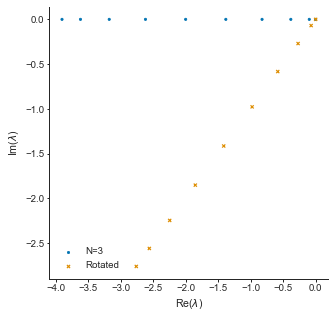

In [7]:
#spectrum comparison: rotation

ENV = LinearTrack(scale=n_state, goal=goal)
GEN = Generator(ENV=ENV, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate)
PROP = Propagator(GEN=GEN)
L = PROP.GEN.evals_fwd.copy();

counter = Counter(L)
uniqueL = np.array(list(counter.keys()))
multipL = np.array(list(counter.values()))
fig = plt.figure(figsize=(5,5))
plt.scatter(uniqueL.real, uniqueL.imag, s=5**multipL, label="N=3")

#rotating eigenvalues by $\varphi$
phi = np.pi/4
uniqueM = complextools.rotate(uniqueL, phi, c=0)
plt.scatter(uniqueM.real, uniqueM.imag, s=10**multipL, label="Rotated", marker="x")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

plt.legend()

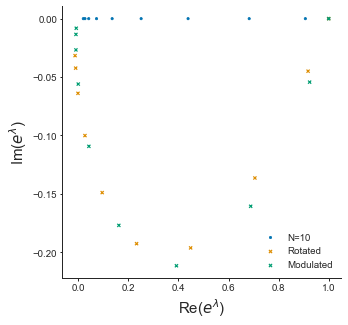

In [8]:
#spectrum of PROPAGATOR
mu = .6
c = 1
alpha = 1.1
modL = complextools.characteristic_fun(uniqueL, mu, c, alpha)

phi = np.pi/6
uniqueM = complextools.rotate(uniqueL, phi, c=0)

fig = plt.figure(figsize=(5,5))
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=5**multipL, label="N=10")
plt.scatter(np.exp(uniqueM).real, np.exp(uniqueM).imag, s=10**multipK, label="Rotated", marker="x")
plt.scatter(modL.real, modL.imag, s=10**multipL, label="Modulated", marker="x")
plt.xlabel("Re($e^\lambda$)", fontsize=15)
plt.ylabel("Im($e^\lambda$)", fontsize=15)

plt.legend()

 <font size="10">TJunction</font> 

GENERATOR: generator constructed from environment transition matrix with jump_rate 0.50
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (28, 28) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 2
EIGENSPECTRUM: algebraic multiplicity > 1.


Text(0, 0.5, 'Im($\\lambda$)')

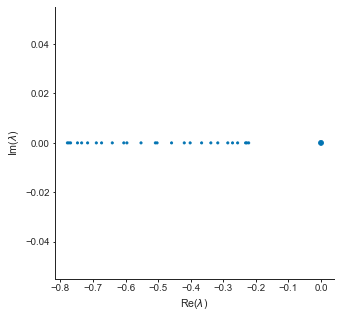

In [10]:
# TJunction (n=4, one-way)
A = np.array([[-1,1,0,0],[0,-1,1/.2,1/2.],[0,0,0,0],[0,0,0,0]])
# %% SETTINGS - ENVIRONMENT
backflow = 0.1 # 0.1
state_start = 23 # 23/26
state_choice = 11
state_junction = 3
states_arm_terminal = [25,27] # terminal states
states_arm_initial = [2,4] # initial arm states
states_central_arm = [26,23,20,17,14,11,8]
states_left_arm = [2,1,0,7,10,13,16,19,22,25]
states_right_arm = [4,5,6,9,12,15,18,21,24,27]
n_arm_states = len(states_central_arm)
blend_weights = np.arange(0,n_arm_states)/(n_arm_states-1)
rho0 = state_start
alpha = 1.
env_lw = 1.

# SETTINGS - GENERATOR
symmetrize = False
jump_rate = 0.5

# SETTINGS - PROPAGATOR
sigma = 1.
tau = 1. # 1.
alpha_diff = 1
alpha_sdiff = 0.5
# ENVIRONMENT
ENV = TJunction(start=state_start, directed=True, complete_circuit=False, backflow=backflow)
rho_rand = np.ones((ENV.n_state,))/ENV.n_state
ENV.env_lw = env_lw

# GENERATOR
GEN = Generator(ENV=ENV, symmetrize=symmetrize, jump_rate=jump_rate)
rho_inf = GEN.stationary_dist()

# PROPAGATOR
PROP = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)

#spectrum
L = PROP.GEN.evals_fwd.copy();
counter = Counter(L)
uniqueL = np.array(list(counter.keys()))
multipL = np.array(list(counter.values()))
fig = plt.figure(figsize=(5,5))
plt.scatter(uniqueL.real, uniqueL.imag, s=5**multipL, label="N=3")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

Text(0, 0.5, 'Im($\\lambda$)')

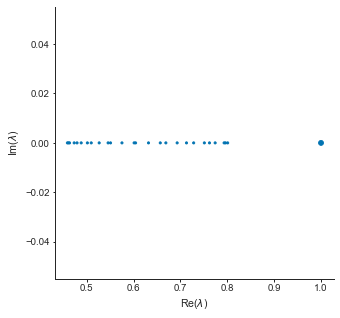

In [11]:
#spectrum of PROPAGATOR
fig = plt.figure(figsize=(5,5))
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=5**multipL, label="N=3")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

 <font size="10">OpenBox</font> 

GENERATOR: generator constructed from environment adjacency matrix with jump_rate 0.50
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is symmetric.
GENERATOR: Q is a generator with shape (100, 100) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: algebraic multiplicity > 1.


Text(0, 0.5, 'Im($\\lambda$)')

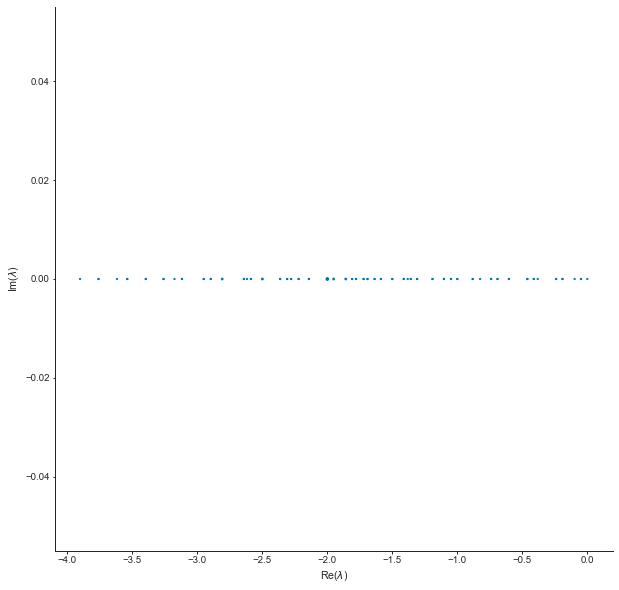

In [12]:
#OpenBox
from environments import OpenBox

scale = 10 # 50

# SETTINGS - PROPAGATOR
sigma = 1.
tau_diff = 1.
tau_sdiff = 1.
n_tau = 2; taus = np.logspace(0.1,10,n_tau)
alpha_diff = 1.
alpha_sdiff = 0.5
no_dwell = False
no_dwell_pfeiffer = True

# SAMPLING
ENV = OpenBox(scale=scale)
start_prop = ENV.start_center

GEN = Generator(ENV=ENV, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate)

PROP_diff = Propagator(GEN=GEN, sigma=sigma, tau=tau_diff, alpha=alpha_diff)

#spectrum
L = PROP_diff.GEN.evals_fwd.copy();
counter = Counter(L)
uniqueL = np.array(list(counter.keys()))
multipL = np.array(list(counter.values()))

fig = plt.figure(figsize=(10,10))
plt.scatter(uniqueL.real, uniqueL.imag, s=2**multipL, label="N=3")
plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")

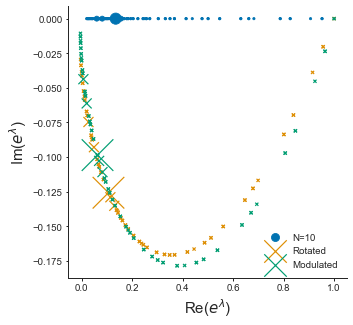

In [14]:
#spectrum of PROPAGATOR
mu = .5
c = 1
alpha = 1.1
modL = complextools.characteristic_fun(uniqueL, mu, c, alpha)

phi = np.pi/7
uniqueM = complextools.rotate(uniqueL, phi, c=0)

fig = plt.figure(figsize=(5,5))
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=5**multipL, label="N=10")
plt.scatter(np.exp(uniqueM).real, np.exp(uniqueM).imag, s=10**multipL, label="Rotated", marker="x")
plt.scatter(modL.real, modL.imag, s=10**multipL, label="Modulated", marker="x")
plt.xlabel("Re($e^\lambda$)", fontsize=15)
plt.ylabel("Im($e^\lambda$)", fontsize=15)

plt.legend()

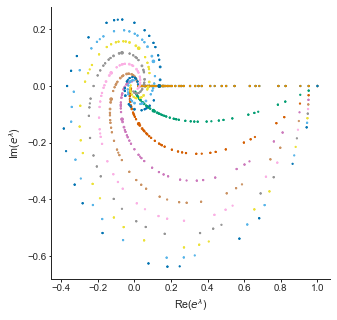

In [17]:
#spectrum of PROPAGATOR
fig = plt.figure(figsize=(5,5))
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=2**multipL)
plt.xlabel("Re($e^\lambda$)")
plt.ylabel("Im($e^\lambda$)")

S = uniqueL #spectrum to rotate
phis = np.linspace(0, np.pi, 10)
mus = np.linspace(0, np.pi, 10)
c = 1
alpha = 1
for mu in mus:
    N = complextools.rotate(S[:], phi, c)
    expN = np.exp(N)
    expN = np.exp(1j*phi)*np.exp(uniqueL)
#     plt.scatter(expN.real, expN.imag, s=2**multipL)
    modL = complextools.characteristic_fun(S, mu, c, alpha)
    plt.scatter(modL.real, modL.imag, s=2**multipL)

# plt.legend();

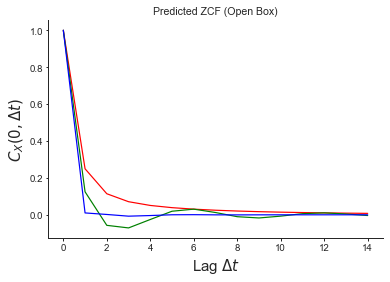

In [19]:
lags_plot = np.arange(0, 15)
PROP_diff = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
Cdiff = PROP_diff.predict_acf(lags=lags_plot, rho_init=ENV.start)

#rotated
S = L
phi = np.pi/3
# N = rotate(S[:], phi, c)
# modL = np.exp(N)
modL = np.exp(1j*phi)*np.exp(S)
PROP_rot = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)
Crot = PROP_rot.predict_acf(lags=lags_plot, rho_init=ENV.start);

#modulated
mu = 5
c = 1
alpha = .3
modL = complextools.characteristic_fun(S, mu, c, alpha)
PROP_mod = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_mod.compute_kernels(power_spec=modL, suppress_imag=False)
Cmod = PROP_mod.predict_acf(lags=lags_plot, rho_init=ENV.start);

plt.plot(Cdiff, label="Diffusion", color=color_diff)
plt.plot(Crot, label="Rotated", color=color_real)
plt.plot(Cmod, label="Modulated", color=color_superdiff)
plt.xlabel("Lag $\Delta t$", fontsize=15);
plt.ylabel("$C_X(0,\Delta t)$", fontsize=15);
plt.title("Predicted ZCF (Open Box)")
plt.savefig("figures/pred_ZCF_OB%s_diffrotmod.png"%scale);

In [24]:
n_samp= 1000
n_step = 25

state_seqs, rhos = complextools.sample_complex(PROP_diff.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_diff, AC_sem_diff = complextools.sample_stats(state_seqs)


#rotated
S = L
phi = np.pi/3
# N = rotate(S[:], phi, c)
# modL = np.exp(N)
modL = np.exp(1j*phi)*np.exp(S)
PROP_rot = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)
state_seqs, rhos = complextools.sample_complex(PROP_rot.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_rot, AC_sem_rot = complextools.sample_stats(state_seqs)

#modulated
mu = 5
c = 1
alpha = .3
S = L
N = complextools.rotate(S[:], phi, c)
expN = np.exp(N)
#     expN = np.exp(1j*phi)*np.exp(uniqueL)
modL = complextools.characteristic_fun(S, phi, c, alpha)
PROP_mod = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_mod.compute_kernels(power_spec=modL, suppress_imag=False)  
state_seqs, rhos = complextools.sample_complex(PROP_mod.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_mod, AC_sem_mod = complextools.sample_stats(state_seqs)

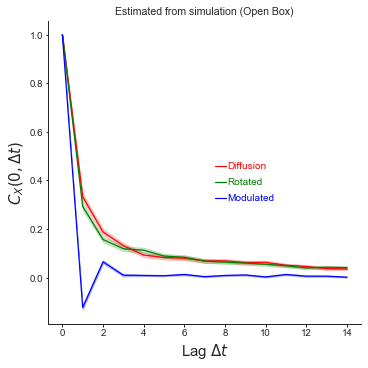

In [25]:
min_lag = 0
max_lag = 15
lags_plot = np.arange(min_lag,max_lag)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5, 5), constrained_layout=True) 
ax0 = axes
plot_wfill(ax=ax0, y=AC_diff[lags_plot], e=AC_sem_diff[lags_plot], x=lags_plot, alpha=0.2, color=color_diff)
plot_wfill(ax=ax0, y=AC_rot[lags_plot], e=AC_sem_rot[lags_plot], x=lags_plot, alpha=0.2, color=color_real)
plot_wfill(ax=ax0, y=AC_mod[lags_plot], e=AC_sem_mod[lags_plot], x=lags_plot, alpha=0.2, color=color_superdiff)
n_phis=3
colorlist = [color_diff, color_real, color_superdiff]
labellist = ["Diffusion", "Rotated", "Modulated"]
for i in range(n_phis):
    ax0.axhline(.46-i/(5*n_phis), xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=colorlist[i])
    ax0.text(x=8.1, y=0.45-i/(5*n_phis), s=labellist[i], color=colorlist[i])
ax0.set_xlabel("Lag $\Delta t$", fontsize=15);
ax0.set_ylabel("$C_X(0,\Delta t)$", fontsize=15);
ax0.set_title("Estimated from simulation (Open Box)")
plt.savefig("figures/calc_ZCF_OB%s_diffrotmod.png"%scale);

In [29]:
lags_plot = np.arange(0, 15)
PROP_diff = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
Cdiff = PROP_diff.predict_acf(lags=lags_plot, rho_init=ENV.start)
PROP_rot = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)

S = L #spectrum to rotate
Crots = []
n_phis = 5
phis = np.linspace(0, np.pi/2, n_phis)

for phi in phis:
    N = complextools.rotate(S[:], phi, c)
    expN = np.exp(N)
    modL = np.exp(1j*phi)*np.exp(S)
    modL = complextools.characteristic_fun(S, phi, c, alpha)
    PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)  #Computes propagator kernels.
    Crots.append(PROP_rot.predict_acf(lags=lags_plot, rho_init=ENV.start))

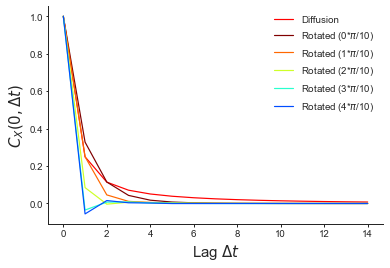

In [30]:
#plot ACFs
fig=plt.plot(Cdiff, label="Diffusion", color=color_diff)
for i,Crot in enumerate(Crots):
    plt.plot(Crot.real, label="Rotated (" + str(i) + "*$\pi$/10)", color=cmap(i/phis.shape[0]))
#     plt.plot(Crot.imag, label="Rotated (Im)", color=color_compl_imag)
plt.legend()
plt.xticks(lags_plot[::2], lags_plot[::2])
plt.xlabel("Lag $\Delta t$", fontsize=15);
plt.ylabel("$C_X(0,\Delta t)$", fontsize=15);
plt.savefig("figures/calc_ZCF_OB%s_diffmods.png"%scale);

In [31]:
n_samp= 1000
n_step = 25

state_seqs, rhos = complextools.sample_complex(PROP_diff.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_diff, AC_sem_diff = complextools.sample_stats(state_seqs)

S = L #spectrum to rotate
n_phis = 5
phis = np.linspace(0, np.pi/2, n_phis)

AC_rots = []
AC_sem_rots = []
for phi in phis:
    N = complextools.rotate(S[:], phi, c)
    expN = np.exp(N)
#     expN = np.exp(1j*phi)*np.exp(uniqueL)
    modL = complextools.characteristic_fun(S, phi, c, alpha)
    PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)  #Computes propagator kernels.
    state_seqs, rhos = complextools.sample_complex(PROP_rot.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
    AC_rot, AC_sem_rot = complextools.sample_stats(state_seqs)
    AC_rots.append(AC_rot)
    AC_sem_rots.append(AC_sem_rot)

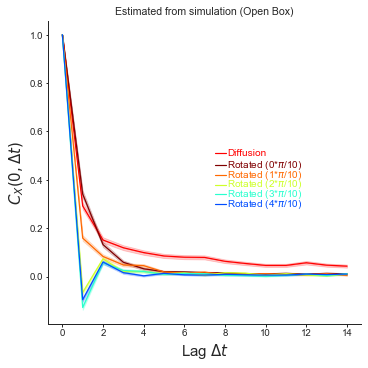

In [32]:
min_lag = 0
max_lag = 15
lags_plot = np.arange(min_lag,max_lag)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5, 5), constrained_layout=True) 
ax0 = axes

plot_wfill(ax=ax0, y=AC_diff[lags_plot], e=AC_sem_diff[lags_plot], x=lags_plot, alpha=0.2, color=color_diff)
for i in range(n_phis):
    plot_wfill(ax=ax0, y=AC_rots[i][lags_plot], e=AC_sem_rots[i][lags_plot], x=lags_plot, alpha=0.2, color=cmap(i/phis.shape[0]))

ax0.axhline(.51, xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=color_diff)
ax0.text(x=8.1, y=0.5, s='Diffusion', color=color_diff)
for i in range(n_phis):
    ax0.axhline(.46-i/(5*n_phis), xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=cmap(i/phis.shape[0]))
    ax0.text(x=8.1, y=0.45-i/(5*n_phis), s="Rotated (" + str(i) + "*$\pi$/10)", color=cmap(i/phis.shape[0]))
ax0.set_xlabel("Lag $\Delta t$", fontsize=15);
ax0.set_ylabel("$C_X(0,\Delta t)$", fontsize=15);
ax0.set_title("Estimated from simulation (Open Box)")
plt.savefig("figures/calc_ZCF_OB%s_diffmods.png"%scale);

 <font size="10">Circle diffusion</font> 

In [66]:
# ENV = Environment()

In [33]:
#Circle diffusion
#Compare spectra for different systems (simple diffusion/added noise/symmetric noise)
n_state = 10
epsilon = 1.
k=1

jump_rate = 1.
forward = True
symmetrize=False

A = complextools.circle_diffusion(n_state)
GEN = Generator(Q=A, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate);
PROP = Propagator(GEN=GEN);
L = PROP.GEN.evals_fwd.copy();
counter = Counter(L)
uniqueL = np.array(list(counter.keys()))
multipL = np.array(list(counter.values()))

#noise(biased)
A = complextools.circle_diffusion(n_state, [k, epsilon]) #symmetric=False
GEN = Generator(Q=A, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate);
PROP = Propagator(GEN=GEN);
K = PROP.GEN.evals_fwd;
counter = Counter(K)
uniqueK = np.array(list(counter.keys()))
multipK = np.array(list(counter.values()))

#noise(symmetric)
A = complextools.circle_diffusion(n_state, [k, epsilon], symmetric=True)
GEN = Generator(Q=A, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate);
PROP = Propagator(GEN=GEN);
M = PROP.GEN.evals_fwd
counter = Counter(M)
uniqueM = np.array(list(counter.keys()))
multipM = np.array(list(counter.values()))

GENERATOR: explicit generator provided
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (10, 10) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: complex eigenvalues: [-0.19098301+0.58778525j -0.19098301-0.58778525j -0.69098301+0.95105652j
 -0.69098301-0.95105652j -1.30901699+0.95105652j -1.30901699-0.95105652j
 -1.80901699+0.58778525j -1.80901699-0.58778525j]
PROPAGATOR: squashing imaginary components.
GENERATOR: explicit generator provided
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (10, 10) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: complex eigenvalues: [-0.88196601+1.53884177j -0.88196601-1.53884177j -2.5       +0.36327126j
 -2.5       -0.36327126j -2.5       +1.53884177j -2.5       -1.53884177j
 -3.11803399+0.36327126j -3.11803399-0.36327126j]
PROPAGATOR: squashing imaginary components.
GENE

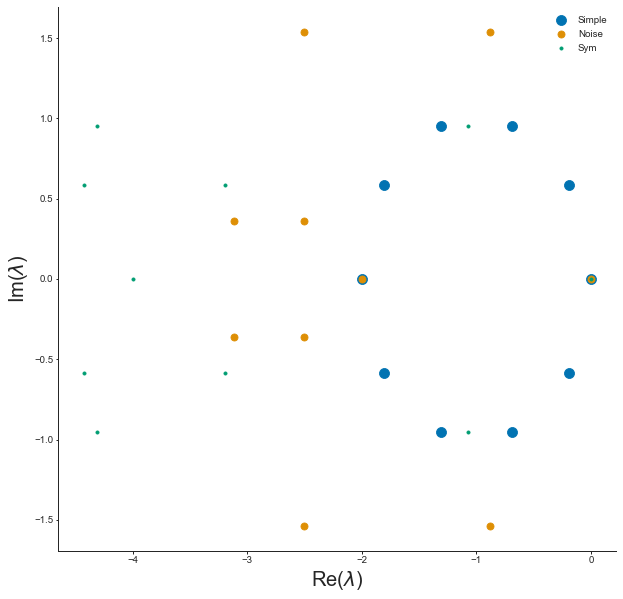

In [34]:
#spectrum comparison
fig = plt.figure(figsize=(10,10))
plt.scatter(L.real, L.imag, s=100, label="Simple")
plt.scatter(K.real, K.imag, s=50, label="Noise")
plt.scatter(M.real, M.imag, s=10, label="Sym")
plt.xlabel("Re($\lambda$)", fontsize=20)
plt.ylabel("Im($\lambda$)", fontsize=20)
plt.legend()

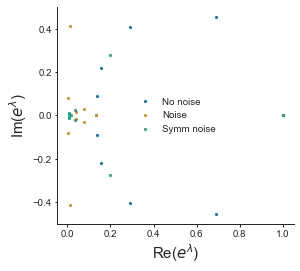

In [35]:
#spectrum of PROPAGATOR
fig, ax = plt.subplots(ncols=1) #figsize=(10,10)
ratio = 1
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.scatter(np.exp(uniqueL).real, np.exp(uniqueL).imag, s=5, label="No noise")
plt.scatter(np.exp(uniqueK).real, np.exp(uniqueK).imag, s=5, label="Noise")
plt.scatter(np.exp(uniqueM).real, np.exp(uniqueM).imag, s=5, label="Symm noise", marker="x")
plt.xlabel("Re($e^\lambda$)", fontsize=15)
plt.ylabel("Im($e^\lambda$)", fontsize=15)

plt.legend()

 <font size="5">Rotation</font> 

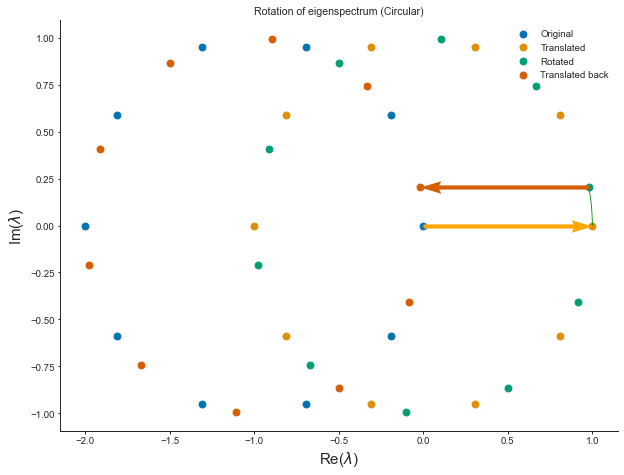

In [36]:
S = L #spectrum to rotate
phi=np.pi/15
c=1 #+4*epsilon
N1 = (S[:] + c)
N2 = (S[:] + c)*np.exp(phi*1j)
N = complextools.rotate(S[:], phi, c)
# N[0] = 0. #
fig = plt.figure(figsize=(10,7.55))
ax = fig.add_subplot(1,1,1)
ax.scatter(S.real, S.imag, s=50, label="Original")
ax.scatter(N1.real, N1.imag, s=50, label="Translated")
ax.scatter(N2.real, N2.imag, s=50, label="Rotated")
ax.scatter(N.real, N.imag, s=50, label="Translated back")
ax.set_xlabel("Re($\lambda$)", fontsize=15)
ax.set_ylabel("Im($\lambda$)", fontsize=15)
ax.legend()

V = np.array([[1,0]])
origin = np.array([[0],[0]]) # origin point
ax.quiver(*origin, V[:,0], V[:,1], color=['orange'], scale_units='xy', scale=1)

r1, r2 = 1., 1.
arc = Arc([0,0], 1, 1, angle=360./n_state, theta1=0, theta2=360/n_state)
# ax.add_patch(arc)
ax.add_artist(arc) #
ax.add_artist(Arc((0, 0), 2, 2, 0, 0, 360*phi/(2*np.pi), color = 'green'))

V = np.array([[-1,0]]) 
origin = np.array([N2[0].real,N2[0].imag])
plt.quiver(*origin, V[:,0], V[:,1], color=['r'], scale_units='xy', scale=1)
plt.title("Rotation of eigenspectrum (Circular)")
plt.savefig("figures/circ_specrot_%s.png"%n_state)

 <font size="5">exp(lamda)</font> 

GENERATOR: explicit generator provided
GENERATOR: matrix rows sum to 0.
GENERATOR: generator is not symmetric.
GENERATOR: Q is a generator with shape (10, 10) .
EIGENSPECTRUM: algebraic multiplicity of zero eigenvalue = 1
EIGENSPECTRUM: complex eigenvalues: [-0.19098301+0.58778525j -0.19098301-0.58778525j -0.69098301+0.95105652j
 -0.69098301-0.95105652j -1.30901699+0.95105652j -1.30901699-0.95105652j
 -1.80901699+0.58778525j -1.80901699-0.58778525j]
PROPAGATOR: squashing imaginary components.


Text(0, 0.5, 'Im($e^\\lambda$)')

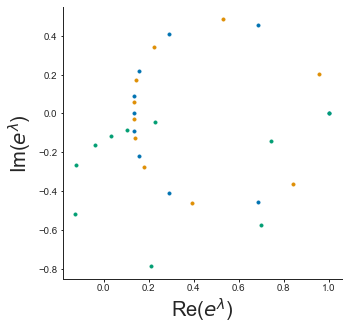

In [39]:
A = complextools.circle_diffusion(n_state)
GEN = Generator(Q=A, forward=forward, symmetrize=symmetrize, jump_rate=jump_rate);
PROP = Propagator(GEN=GEN);
L = PROP.GEN.evals_fwd.copy();

expL = np.exp(L)
expN = np.exp(N)
fig = plt.figure(figsize=(5,5))
plt.scatter(expL.real, expL.imag, s=10, label="")
plt.scatter(expN.real, expN.imag, s=10, label="")
modL = complextools.characteristic_fun(S, 1, c, alpha)
plt.scatter(modL.real, modL.imag, s=10, label="")
plt.xlabel("Re($e^\lambda$)", fontsize=20)
plt.ylabel("Im($e^\lambda$)", fontsize=20)

In [40]:
# phi = np.pi/3
# S = L
# N = rotate(S[:], phi, c)
# np.sum(S), np.sum(N)
# np.product(S), np.product(N)

# np.sum(np.exp(S)), np.sum(np.exp(N))
# np.product(np.exp(S)), np.product(np.exp(N)) 
# #in exp(i\phi)s sum is preserved so in exp(exp(i\phi)s) product is preserved

In [41]:
phi = np.pi/3
PROP_diff = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_rot = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
expN = np.exp(1j*phi)*np.exp(L)
modL = complextools.characteristic_fun(S, 1, c, alpha)
PROP_rot.compute_kernels(power_spec=expN, suppress_imag=False)  #Computes propagator kernels.

PROPAGATOR: squashing imaginary components.
PROPAGATOR: squashing imaginary components.


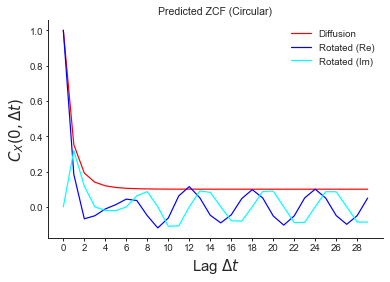

In [42]:
lags_plot = range(0,30)
Cdiff = PROP_diff.predict_acf(lags=lags_plot, rho_init=0)
Crot = PROP_rot.predict_acf(lags=lags_plot, rho_init=0)

#plot ACFs
fig=plt.plot(Cdiff, label="Diffusion", color=color_diff)
plt.plot(Crot.real, label="Rotated (Re)", color=color_compl)
plt.plot(Crot.imag, label="Rotated (Im)", color=color_compl_imag)
plt.legend()
plt.xticks(lags_plot[::2], lags_plot[::2])
plt.xlabel("Lag $\Delta t$", fontsize=15);
plt.ylabel("$C_X(0,\Delta t)$", fontsize=15);
plt.title("Predicted ZCF (Circular)")
plt.savefig("figures/pred_ZCF_circ_%s.png"%n_state)

In [44]:
S = L #spectrum to rotate
Crots = []
phis = np.linspace(0, np.pi/2, 5)
for phi in phis:
    N = complextools.rotate(S[:], phi, c)
    modL = np.exp(N)
#     expN = np.exp(1j*phi)*np.exp(uniqueL)
    modL = complextools.characteristic_fun(S, phi, c=2, alpha=.5)
    PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)  
    Crots.append(PROP_rot.predict_acf(lags=lags_plot, rho_init=0))

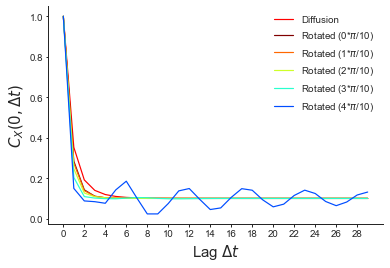

In [45]:
#plot ACFs
fig=plt.plot(Cdiff, label="Diffusion", color=color_diff)
for i,Crot in enumerate(Crots):
    plt.plot(Crot.real, label="Rotated (" + str(i) + "*$\pi$/10)", color=cmap(i/phis.shape[0]))
#     plt.plot(Crot.imag, label="Rotated (Im)", color=color_compl_imag)
plt.legend()
plt.xticks(lags_plot[::2], lags_plot[::2])
plt.xlabel("Lag $\Delta t$", fontsize=15);
plt.ylabel("$C_X(0,\Delta t)$", fontsize=15);
plt.savefig("figures/pred_ZCF_circ%s.png"%n_state)

In [46]:
rho_start = np.zeros((n_state))
rho_start[0] = 1.
# state_seqs, rhos = sample_complex(PROP_diff.etO, rho_start_idx=0, n_samp=n_samp, n_step=n_step)
# AC_diff, AC_sem_diff = sample_stats(state_seqs)

S = L #spectrum to rotate
phi=np.pi/2
# N = rotate(S[:], phi, c)
modL = np.exp(1j*phi)*np.exp(S)
PROP_rot = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)  
state_seqs, rhos = complextools.sample_complex(PROP_rot.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_rot, AC_sem_rot = complextools.sample_stats(state_seqs)

S = L #spectrum to modulate
phi=np.pi/2
# N = rotate(S[:], phi, c)
modL = np.exp(1j*phi)*np.exp(S)
modL = complextools.characteristic_fun(S, phi, c=2, alpha=.5)
PROP_mod = Propagator(GEN=GEN, sigma=sigma, tau=tau, alpha=alpha_diff)
PROP_mod.compute_kernels(power_spec=modL, suppress_imag=False)  
state_seqs, rhos = complextools.sample_complex(PROP_rot.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
AC_mod, AC_sem_mod = complextools.sample_stats(state_seqs)

PROPAGATOR: squashing imaginary components.
PROPAGATOR: squashing imaginary components.


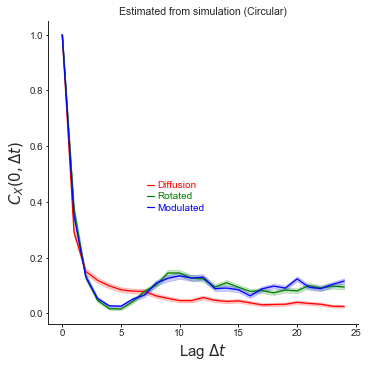

In [48]:
from visualization import label_panel, page_width, row_height, color_diff, color_superdiff, color_acmin, plot_wfill, save_figure

min_lag = 0
max_lag = 25
lags_plot = np.arange(min_lag,max_lag)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5, 5), constrained_layout=True) 
ax0 = axes

plot_wfill(ax=ax0, y=AC_diff[lags_plot], e=AC_sem_diff[lags_plot], x=lags_plot, alpha=0.2, color=color_diff)
plot_wfill(ax=ax0, y=AC_rot[lags_plot], e=AC_sem_rot[lags_plot], x=lags_plot, alpha=0.2, color=color_real)
plot_wfill(ax=ax0, y=AC_mod[lags_plot], e=AC_sem_rot[lags_plot], x=lags_plot, alpha=0.2, color=color_superdiff)

for i in range(3):
    ax0.axhline(.46-i/(5*n_phis), xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=colorlist[i])
    ax0.text(x=8.1, y=0.45-i/(5*n_phis), s=labellist[i], color=colorlist[i])
ax0.set_xlabel("Lag $\Delta t$", fontsize=15);
ax0.set_ylabel("$C_X(0,\Delta t)$", fontsize=15);
ax0.set_title("Estimated from simulation (Circular)")
plt.savefig("figures/calc_ZCF_circ%s.png"%n_state)

In [49]:
S = L #spectrum to rotate
phis = np.linspace(0, np.pi/2, 5)
AC_rots = []
AC_sem_rots = []
for phi in phis:
    N = complextools.rotate(S[:], phi, c)
    expN = np.exp(N)
#     expN = np.exp(1j*phi)*np.exp(uniqueL)
    modL = complextools.characteristic_fun(S, phi, c=2, alpha=.5)
    PROP_rot.compute_kernels(power_spec=modL, suppress_imag=False)  #Computes propagator kernels.
    state_seqs, rhos = complextools.sample_complex(PROP_rot.etO, rho_start_idx=1, n_samp=n_samp, n_step=n_step)
    AC_rot, AC_sem_rot = complextools.sample_stats(state_seqs)
    AC_rots.append(AC_rot)
    AC_sem_rots.append(AC_sem_rot)

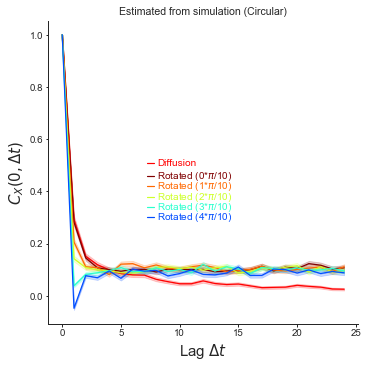

In [50]:
min_lag = 0
max_lag = 25
lags_plot = np.arange(min_lag,max_lag)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5, 5), constrained_layout=True) 
ax0 = axes

plot_wfill(ax=ax0, y=AC_diff[lags_plot], e=AC_sem_diff[lags_plot], x=lags_plot, alpha=0.2, color=color_diff)
for i in range(5):
    plot_wfill(ax=ax0, y=AC_rots[i][lags_plot], e=AC_sem_rots[i][lags_plot], x=lags_plot, alpha=0.2, color=cmap(i/phis.shape[0]))

for i in range(n_phis):
    ax0.axhline(.46-i/(5*n_phis), xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=cmap(i/phis.shape[0]))
    ax0.text(x=8.1, y=0.45-i/(5*n_phis), s="Rotated (" + str(i) + "*$\pi$/10)", color=cmap(i/phis.shape[0]))
ax0.axhline(.51, xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=color_diff)
# ax0.axhline(.46, xmin=.8*(10/(max_lag+min_lag)), xmax=.85*(10/(max_lag+min_lag)), color=color_compl)
ax0.text(x=8.1, y=0.5, s='Diffusion', color=color_diff)
# ax0.text(x=8.1, y=0.45, s='Rotated', color=color_compl)
ax0.set_xlabel("Lag $\Delta t$", fontsize=15);
ax0.set_ylabel("$C_X(0,\Delta t)$", fontsize=15);
ax0.set_title("Estimated from simulation (Circular)")
plt.savefig("figures/calc_ZCF_circ%s.png"%n_state)

In [ ]:
#minimize for mu, alpha and c in characteristic function